<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/nhnl_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Nifty 50 constituents
nifty50_url = "https://archives.nseindia.com/content/indices/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()

# Fetch historical data
start_date = "2018-01-01"
data = yf.download(tickers, start=start_date)['Adj Close']


[*********************100%***********************]  50 of 50 completed


In [3]:
# Fetch Nifty 50 index data
nifty50_data = yf.download("^NSEI", start=start_date)['Adj Close']


[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate 52-week new highs and new lows
new_highs_52wk = data.rolling(window=60).max()
new_lows_52wk = data.rolling(window=60).min()

# Calculate daily stocks hitting new 52-week highs and new 52-week lows
new_highs_count = (data == new_highs_52wk).sum(axis=1)
new_lows_count = (data == new_lows_52wk).sum(axis=1)

# Calculate 52-week new high - 52-week new low
new_high_low_diff = new_highs_count - new_lows_count


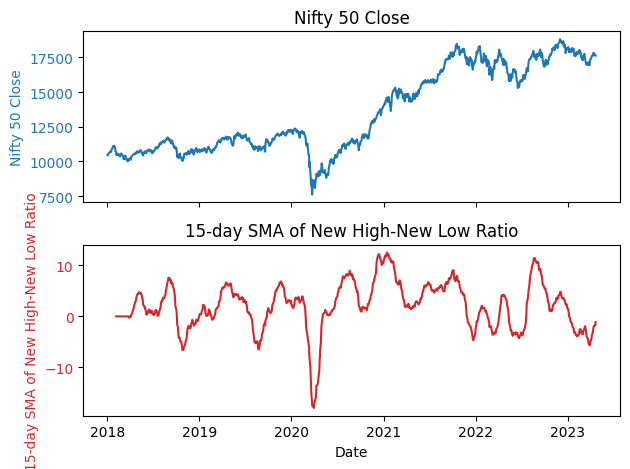

In [5]:
# Calculate 15-day SMA of new high-new low ratio
sma_15d_new_high_low_diff = new_high_low_diff.rolling(window=25).mean()

# Plot Nifty 50 close and 15-day SMA of new high-new low ratio in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Nifty 50 Close')

ax2.set_xlabel('Date')
ax2.set_ylabel('15-day SMA of New High-New Low Ratio', color='tab:red')
ax2.plot(sma_15d_new_high_low_diff.index, sma_15d_new_high_low_diff, color='tab:red', label='15-day SMA of New High-New Low Ratio')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('15-day SMA of New High-New Low Ratio')

fig.tight_layout()
plt.show()


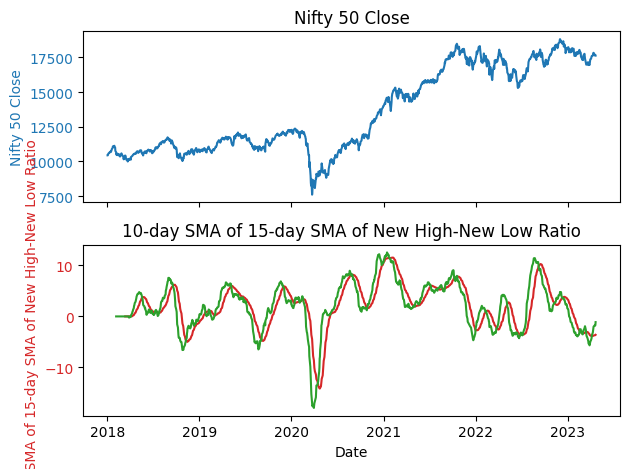

In [6]:
# Calculate 10-day SMA of 15-day SMA of new high-new low ratio
sma_10d_of_15d_new_high_low_diff = sma_15d_new_high_low_diff.rolling(window=25).mean()

# Plot Nifty 50 close and 10-day SMA of 15-day SMA of new high-new low ratio in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Nifty 50 Close')

ax2.set_xlabel('Date')
ax2.set_ylabel('10-day SMA of 15-day SMA of New High-New Low Ratio', color='tab:red')
ax2.plot(sma_10d_of_15d_new_high_low_diff.index, sma_10d_of_15d_new_high_low_diff, color='tab:red', label='10-day SMA of 15-day SMA of New High-New Low Ratio')
ax2.plot(sma_15d_new_high_low_diff.index, sma_15d_new_high_low_diff, color='tab:green', label='15-day SMA of New High-New Low Ratio')

ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('10-day SMA of 15-day SMA of New High-New Low Ratio')

fig.tight_layout()
plt.show()
